# Exercise 4

## physics718: Programming in Physics and Astronomy with C++ or Python (SS 2020)
Oliver Cordes & Thomas Erben

Homework is due on **Friday, 29/05/2020, 23:59pm**

 * You only learn a programming language by actively praticing and using it! We therefore **strongly** advise you to work on the homework problems.
 * Please discuss the problems with your student peers in case of problems.
 * Your code(s) needs to be well and appropriately commented!
 * All files of your solution should be in the same directory as this notebook including scripts, images, additional notebooks etc.
 * References to files in scripts and notebooks should be done with relative paths
 * Finally submit this notebook with your solutions in the nbgrader system
 
**Main topics of this exercise:**
 * functions
 * *numpy* arrays

Put in here your group number: 

Group 26

# 1. Sieves with numpy (20 Points)

One mathematical algorithm to generate sequences of numbers is the sieve algorithm. In these algorithms one starts with a list of integer numbers $1,2,3,4,...$ and consecutively removes individual numbers with a given rule set. The most prominent sieves are the Sieve of Eratosthenes and the Sieve to generate Lucky numbers. In this exercise we want to implement both sieves with numpy operations.

## 1.1 The sieve of Eratosthenes (10 Points)

The sieve of Eratosthenes is an easy but effective algorithm to search for prime numbers until a given number $N$. 

You can use the following steps to implement the sieve:

 1. you can create an boolean *numpy*-array of the length $N+1$ in which all elements have the value *True*. The indices 
   in this array represents the integer numbers. At the end of the procedure all the indices of the elemnets with are *True* are    the prime numbers.
 2. set the array elements with the indices 0 and 1 to False, because they are no prime numbers
 3. start with the element at the index 2, sets all elements to *False* which are multiples of the current index. Don't change 
   the current index! For the index 2, the indices of the elements to be set to *False* are $4, 6, 8, \dots$. For the index 3
   the indices are $6, 9, 12, \cdots$, etc. 
 4. do step 3. for all indices $i$ with $2\leq i \leq \sqrt{N}$ 
 5. Finally all indices with are *True* representing prime numbers.

The following figure illustrate the algorithm. Prime numbers are marked with arrows.

<img src="prime-sieve.jpg" style="width: 400px;"> 

**Your task**:

Implement the sieve of Eratosthenes in a python function *sieve_of_eratosthenes*. The function should have only one argument, the number of elements $N$. The function should return a numpy array of the prime numbers.

**Hints**:
 * Use the numpy masking to set all mupliples of an index to *False*. 
 * you can create an bool array like this

In [22]:
import numpy as np

b = np.array([True]*20)  # create a bool numpy array with 20 elements
b

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

 * To convert the bool array into a list of numbers you can use these algorithm:

In [23]:
import numpy as np

c = [False, False, True, True, False, True]
print(np.nonzero(c)[0])

[2 3 5]


In [97]:
import sys
import math
import numpy as np

# The following ensures that arrays are printed without truncation within a notebook
np.set_printoptions(threshold=sys.maxsize)

#define a function that gives all the prime numbers smaller than or equal to N
def sieve_of_eratosthenes(N):
    #initialize an array with N+1 boolean values all set to true.
    p = np.array([True]*(N+1))
    
    #0 and 1 are both non-prime
    p[0]=p[1]=False
    
    #loop over each integers within 2 and \sqrt{N}
    for mul in range(2,math.ceil(np.sqrt(N))):
        
        #create a mask for each multiplier
        mask=[i*mul for i in range(2,N//mul+1)]
        
        #set the masked values to false
        p[mask]=False
        
    #return the index of true values    
    return np.nonzero(p)[0]
    
sieve_of_eratosthenes(100)

array([ 2,  3,  5,  7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59,
       61, 67, 71, 73, 79, 83, 89, 97])

Test your code here:

In [56]:
print(sieve_of_eratosthenes(10))

[2 3 5 7]


In [57]:
assert(np.any(sieve_of_eratosthenes(10) == np.array([2,3,5,7])))

## 1.2 Lucky numbers (10 Points)

The second sieve algorithm is the generation of the so called *Lucky numbers*. These are a series of integer numbers $1,3,7,9,13,...$. The steps for the sieve are as follows:

1. begin with a list of integers starting with $1$:
   $$1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, ...$$
2. now eliminate every second number:
   $$ 1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21, 23, 25, ... $$
3. the second remaining number is 3, so remove every 3rd number:
   $$ 1, 3, 7, 9, 13, 15, 19, 21, 25, ... $$
4. the next remaining number is 7, so remove every 7th number:
   $$ 1, 3, 7, 9, 13, 15, 21, 25, ... $$
5. next, remove every 9th number and so on.

**Your task**:

Write a function *lucky_numbers* which has one argument $N$ which is the maximum number to be checked. The function should return a numpy array which contains the lucky numbers smaller or equal $n$. Choose a proper return value for the case $N=0$ and $N=1$. It is forbidden to loop over elements, only numpy functions are allowed! In comparison to the sieve of Eratosthenes you will reduce the elements of the list of numbers in each step by masking instead of creating a full mask for the prime numbers.

**Hints**:
* use a while loop for all the masking steps, the loop should end when the current index is reaching the length of the array. Note here that the length is changing in every step!
* in each step create a bool mask in which you define which element should be masked out with *False* and apply this mask
  to get a new array

In [73]:
import numpy as np

#define a function that gives all the lucky numbers smaller than or equal to N
def lucky_numbers(N):
    
    #create an array from 1 to N
    p=np.arange(1,N+1)
    
    #edge cases handling: return the original arrays if N=0 or 1.
    if N in [0,1]:
        return p
    
    #create a mask of the same length as p, initialize to true
    mask = np.ones(len(p), dtype=bool)
    
    #every second number are set to false
    mask[1::2]=False
    p=p[mask]
    
    i=1
    
    #loop until current index is bigger than the length of p
    while p[i]<=len(p):
        
        #change the length of the mask each time because the length of p is changing
        mask = np.ones(len(p), dtype=bool)
        
        #find the multiplier p[i] and set every multiples of that to false
        mask[(p[i]-1)::p[i]]=False
        
        #delete the corresponding numbers in p
        p=p[mask]
        i=i+1
    return p

lucky_numbers(13)
    

[ 1  3  7  9 13]


array([ 1,  3,  7,  9, 13])

Your test cell:

In [74]:
print(lucky_numbers(10))

[1 3 7 9]
[1 3 7 9]


In [75]:
b = lucky_numbers(13)
assert(np.all(b == np.array([1,3,7,9,13], dtype=np.int64) ))

[ 1  3  7  9 13]


# 2. Sampling problem (10 Points)

In the first exercise we had a documentation about the Bessel functions. We will again look at the Bessel functions of the first kind which can be written for $x\gg n$ in the asymptotic form:

$$J_n(x) \approx \sqrt{\frac{2}{\pi x}}\cos(x-(n\frac{\pi}{2}+\frac{\pi}{4}))$$

As you can see it is a periodic function which envelope scales with $\approx \sqrt{\frac{1}{x}}$. 

For different values of $n$ for $x\gg n$ the periodic approximations only differ in the phase, so we can use $n=0$ as an example.

Usually to plot a function with matplotlib you're using a $x$ array created with *np.linspace* in an interval $[a,b]$, calculate the function values $y$  and plot $x$ vs. $y$. If we are doing so, we get the plot from the interval $[0.1,50]$ (left plot) and $[0.1,300]$ (right plot). 
<table>
    <tr>
        <td><img src="bessel50_plot.png"/></td>
        <td><img src="bessel300_plot.png"/></td>
    </tr>
</table>
In both plots the red lines are the upper envelopes of the Bessel functions. As one can see the right plot looks not as expected whereas the left one fits nicely the envelope function. 

This problem is well understood and described as the Nyquist sampling (have a look at this [page](http://microscopy.berkeley.edu/courses/dib/sections/02Images/sampling.html)). It basically means that the amount of numbers which is used for the plot is too small in the right plot. 

During the discussions of this problem is how to quantify how good the sampling of the function would be. One idea 
was that undersampled periodic functions have less roots than a well sampled functions. Your task would be to calculate the minimum number of elements a sampled Bessel function should have.

**Your task**:

 * implement the $J_0$ function.
 * write a function *min_samples* and calculates the minimum number of elements necessary to make a proper plot for $J_0$ from $0.1$ until $300$ and plot the function. Do the plot looks now okay? *min_samples* should accept two parameters $a$ and $b$ which describes the plot interval and should return an integer as the result.



In [157]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import math

#define the asmptotic form of j_0
def j_0(x):
    return np.sqrt(2/(np.pi*x))*np.cos(x-np.pi/4)

def min_sample(a, b):
    #find the smallest integer that is bigger than or equal to a
    n_min=math.ceil(a/np.pi-3/4)
    
    #find the biggest integer that is smaller than or equal to b
    n_max=math.floor(b/np.pi-3/4)
    
    #return the number of zeros plus 1
    return n_max-n_min+2

min_sample(0.1,300)
  

96

Write here your own tests:

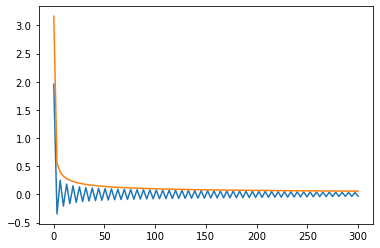

In [159]:
import matplotlib.pyplot as plt
x=np.linspace(0.1,300,min_sample(0.1,300))
y=j_0(x)
plt.plot(x,y)
plt.plot(x,1/np.sqrt(x))

In [151]:
assert(min_sample(0.1,300) == 96)

# 3. A fair game? (20 Points)

A gambler offers you the following game:
1. To play one game, you have to pay him 600 Euros.
2. For each game you have to give him a limit between 2 and 999 Euros.
3. He gives you an envelope with an arbitraty amount of money (uniform distribution) between 1 and 1000 Euros.
4. If the amount of money in the envelope is equal or above your limit of (2.) you have to accept the money and the game ends.
5. If the amount of money in the envelope is below your limit of (2), he gives you a new envelope - again with an arbitrary amount of money between 1 and 1000 Euros. You have to accept the amount of money in the second envelope and the game ends. Note that the amount of money in the second envelope can be lower than what you would have got with the first one!


In this task, we want to check, with which strategy for the limit of (2) the game  is favourable for you. The game is said to be favourable if the *expectation value* of your win minus the initial bet of 600 Euros is positive.

**Your tasks**:

1. Write a function `win` which takes the limit of (2) as an argument. Within the function perform 20000 simulation of the game. The function should return the mean and the standard deviation of the win from the 20000 realisations.

  **Hints / Remarks:** 
  1. a *numpy*-array with the necessary random numbers can be created with the `numpy.random.uniform` function; 
  2. besides the creation of the initial array of random numbers, the function can be done with 2-3 essential lines of code using boolean indexing and array assignments; it is very similar to the *estimation of $\pi$*-example we did in the lecture stream; 
  3. mean and standard deviation of a *numpy*-array can be obtained with the function `np.mean` and `np.std`. 
  4. you are **not** allowed to use any loop constructs over the 20000 simulations within this function.
  
2. In the main body of your program, loop over possible limits from 1 to 999 Euros, obtain the win expectation with those strategies and store these values in a *numpy*-array. Make a plot of the expected win values. For wich strategies is the game favourable for you?

  **Hint:** We will learn later, how you could do also this task without a loop-construct.
  
3. Finally, consider playing games with setting the limit arbitrarily between 1 and 999 Euros for each game. What is the expected win and the standard deviation in that case?  

584.437081739861 272.80944087514297
[266 274 275 276 277 280 282 283 284 285 286 287 289 290 291 292 293 294
 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311 312
 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329 330
 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347 348
 349 350 351 352 353 354 355 356 357 358 359 360 361 362 363 364 365 366
 367 368 369 370 371 372 373 374 375 376 377 378 379 380 381 382 383 384
 385 386 387 388 389 390 391 392 393 394 395 396 397 398 399 400 401 402
 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 420
 421 422 423 424 425 426 427 428 429 430 431 432 433 434 435 436 437 438
 439 440 441 442 443 444 445 446 447 448 449 450 451 452 453 454 455 456
 457 458 459 460 461 462 463 464 465 466 467 468 469 470 471 472 473 474
 475 476 477 478 479 480 481 482 483 484 485 486 487 488 489 490 491 492
 493 494 495 496 497 498 499 500 501 502 503 504 505 506 507 508 509 510
 511 512 513 51

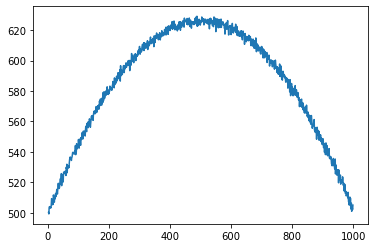

In [128]:
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt

#define a function which gives the average and the standard deviation of 20000 trial rounds
def win(limit):
    
    #create an array with shape (20000,2) from uniform distribution
    realisations = np.random.uniform(1,1001,(20000,2))
    
    #create a mask where the correct column is chosen
    mask=np.where(realisations[:,0]>=limit,0,1)
    
    #select the right column in each row to get an one-dimensional array with 20000 numbers
    payoff=realisations[np.array([True]*20000),mask]
    return np.mean(payoff), np.std(payoff)

#create two empty arrays
average=np.array([])
standard_deviation=np.array([])

#loop over all possible limits
for i in range(2,1000):
    
    #put the average win and std of that limit respectively into two arrays
    average=np.append(average,win(i)[0])
    standard_deviation=np.append(standard_deviation,win(i)[1])

#calculate the respective averages of these two arrays
exp_win=np.mean(average)
exp_std=np.mean(standard_deviation)
print(exp_win,exp_std)

#plot the expected win for each possible limit
plt.plot(range(2,1000),average)

#find the win that is bigger than 600 and then find the corresponding limit
favorable=np.where(average>600)[0]+2
print(favorable)